In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [18]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [26]:
x=data.data
y=data.target

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [28]:
from sklearn.linear_model import LinearRegression
L= LinearRegression()

In [29]:
L.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred=L.predict(X_test)

In [31]:
y_pred

array([226.51848598, 157.46329293,  89.86172648, 207.92043638,
       175.27464325, 146.48196423, 131.11782081,  97.37923306,
       102.94499199, 181.69238112, 237.97531281, 134.74726724,
       189.44205531,  59.92873145, 179.98730177, 117.78561801,
       120.30969646, 126.66229732, 165.19425279, 147.78162151,
       145.4387221 , 124.41329425,  51.96058948, 227.75415791,
       218.10133602, 129.82865712, 160.13538356, 201.17200936,
       184.84143661,  68.90970369, 237.00685674,  58.17158783,
       154.39979192, 119.15941043, 234.0319742 , 172.80143208,
       139.94775146, 169.99263492, 214.59145267, 220.47784209,
       128.98250674, 186.20992149, 162.87053192, 179.77640803,
       107.76869146, 249.52929292, 140.92355113,  32.74846723,
       177.96181001, 145.76575416, 291.96774118, 125.71074727,
       107.27012754, 156.10001536, 115.93096259, 160.35263722,
       229.48001183, 173.38808746, 159.87971544, 123.05044568,
        88.54923021, 122.87202843, 169.12811086, 101.97

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


***"I did the same work using ridge regression."***

In [38]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [39]:
R.fit(X_train,y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [40]:
y_pred1= R.predict(X_test)

In [41]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.518973263588496
RMSE 48.71893700181951


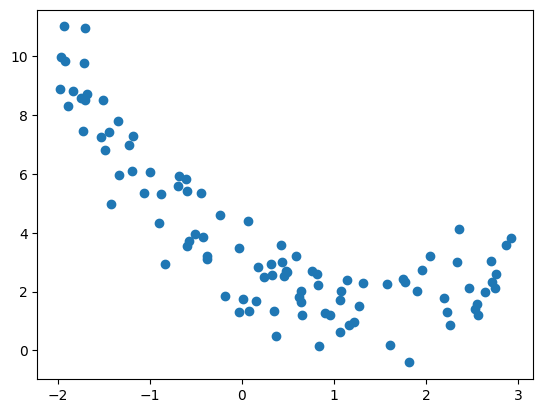

In [42]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

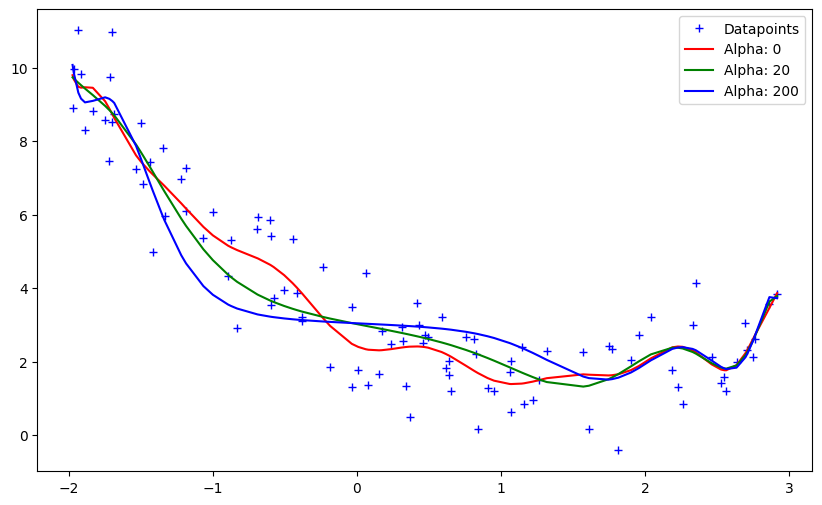

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()